In [1]:
# Import packages 
import numpy as np 
import sklearn as sk
from sklearn.svm import SVC, SVR 
from sklearn.datasets import make_blobs # For generating random data
from sklearn.inspection import DecisionBoundaryDisplay # For visualising support vectors 
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt 

# 1. Exercises 

## 1.1 Two Gaussians 

In [4]:
# Generate random data with mean of 0 +- 1 and covariance of 1
x1 = np.random.randn(50,2) + 1 
x2 = np.random.randn(51,2) - 1 

In [5]:
x1.shape, x2.shape

((50, 2), (51, 2))

In [6]:
y1 = np.ones((50,1))
y2 = -1.0*np.ones((51,1));

In [7]:
y1.shape, y2.shape

((50, 1), (51, 1))

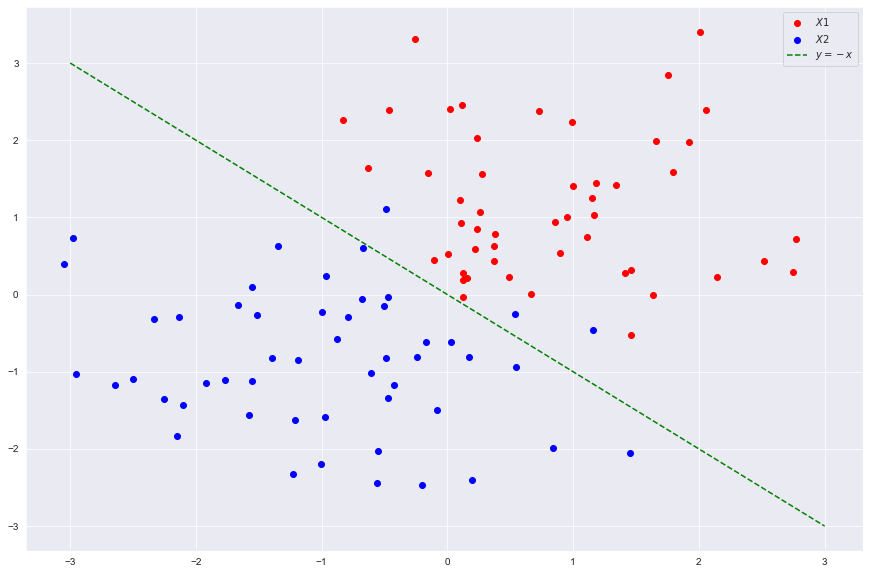

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
plt.plot(x1[:,0], x1[:,1], 'ro')
plt.plot(x2[:,0], x2[:,1], 'bo')
x = np.arange(-3,4)
y = x*-1
plt.plot(x, y, 'g--')
plt.legend(['$X1$', '$X2$', '$y=-x$'])

Question: 
Obtain a line to classify the data by using what you know about the distributions of the data. In which sense is it optimal?

Answer: Linear split line y=-x is the optimal line to split the dataset since the two Gaussian distributions have a mean of $\mu$(X1) = (1,1) and $\mu$(X2) = (-1,-1). The line of y=-x runs perfectly in the middle between these two distributions at the midpoint between their means. 

## 1.2 Support vector machine classifier 

__Regularisation for linear support vector machine__ 

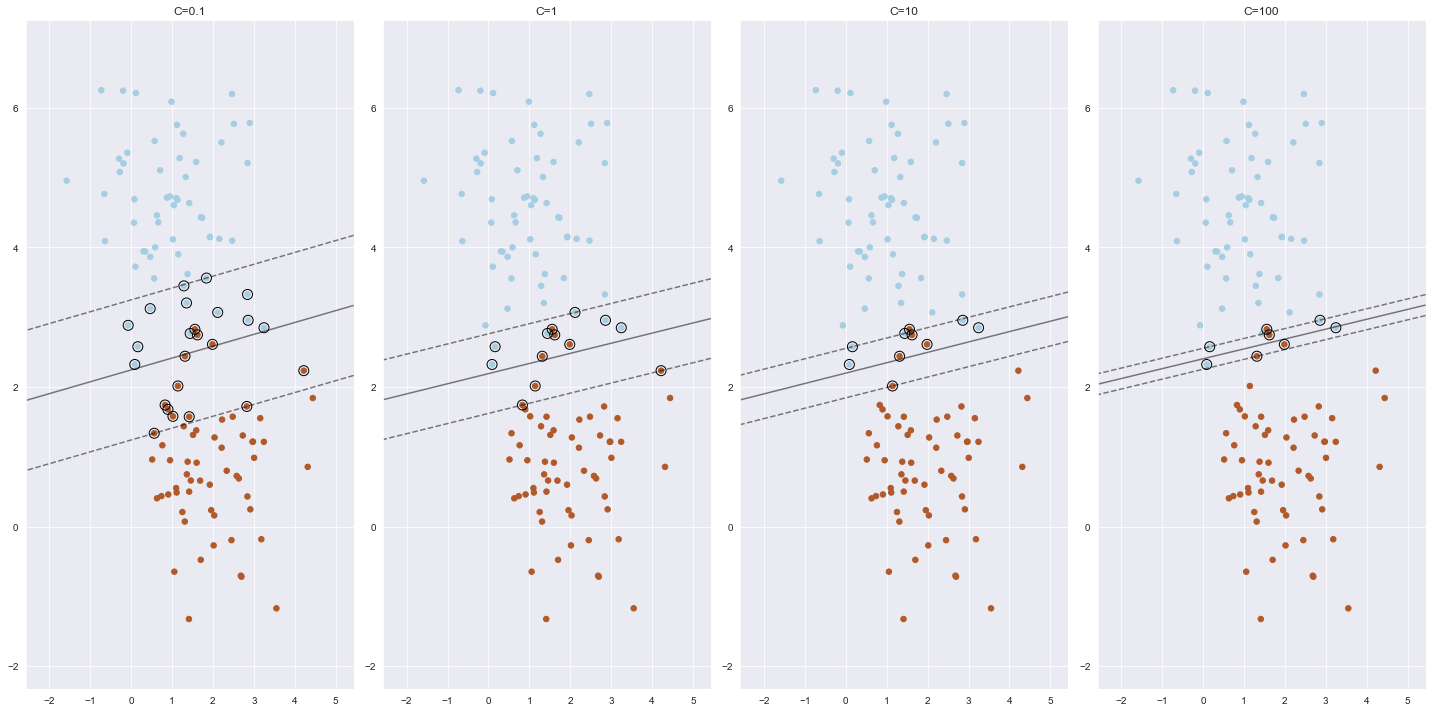

In [31]:
X, y = make_blobs(n_samples=120, centers=2, random_state=0)

plt.figure(figsize=(20, 10))
# Loop through different regularisation parameters 
C_list = [0.1, 1, 10, 100]
for i, C in enumerate(C_list):    
    clf = SVC(
        C=C,
        kernel='linear', # 'rbf'
        random_state=42).fit(X, y)
    
    support_vectors = clf.support_vectors_

    plt.subplot(1, len(C_list), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

__Regularisation for rbf support vector machine__ 

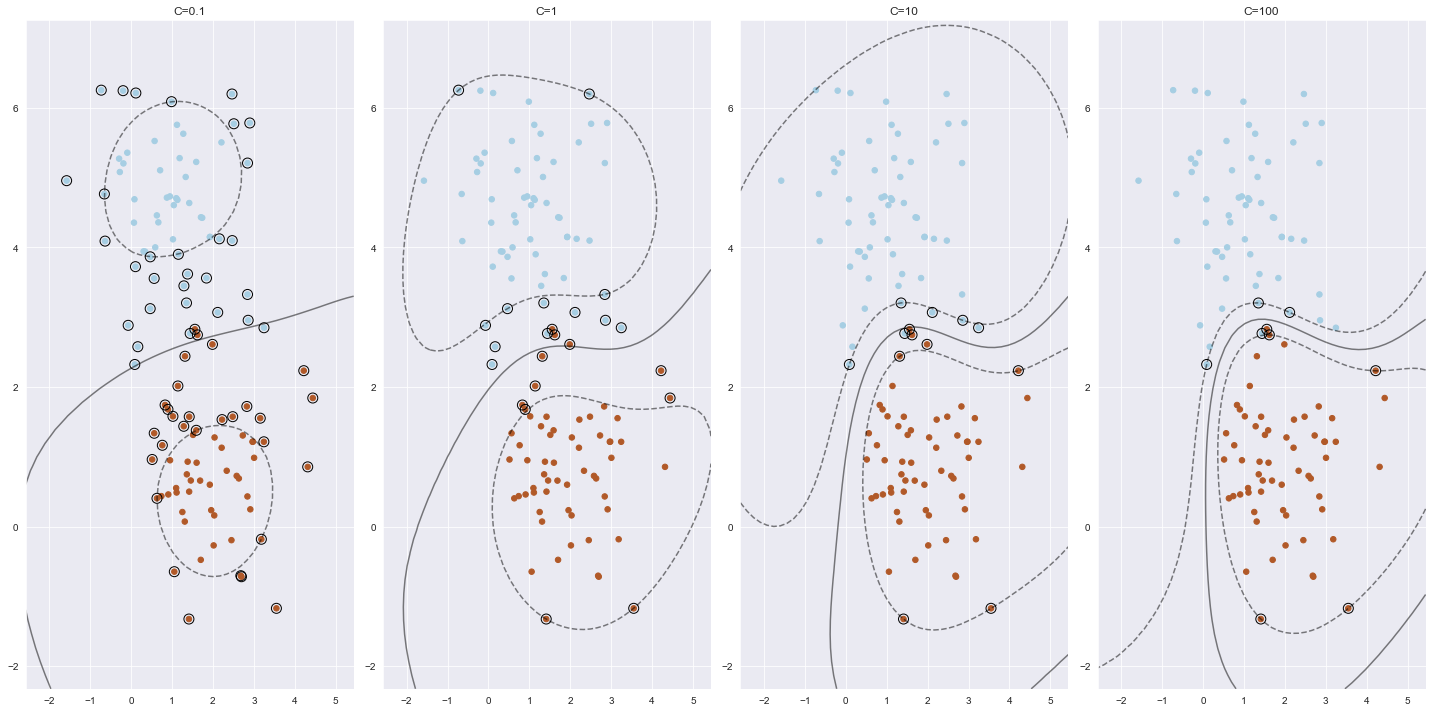

In [30]:
X, y = make_blobs(n_samples=120, centers=2, random_state=0)

plt.figure(figsize=(20, 10))
# Loop through different regularisation parameters 
C_list = [0.1, 1, 10, 100]
for i, C in enumerate(C_list):    
    clf = SVC(
        C=C,
        kernel='rbf', # 'rbf'
        random_state=42).fit(X, y)
    
    support_vectors = clf.support_vectors_

    plt.subplot(1, len(C_list), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

__Datapoints for linear support vector machine__ 

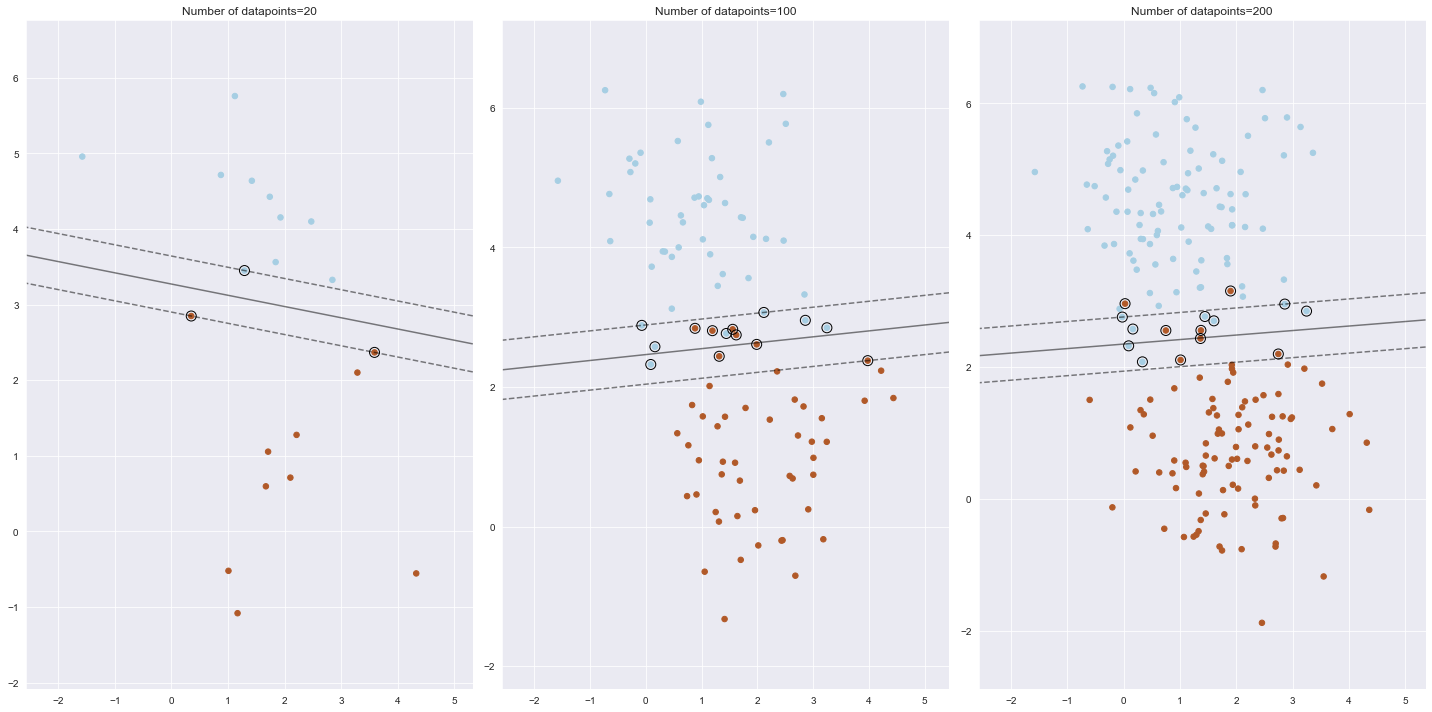

In [36]:
plt.figure(figsize=(20, 10))
# Loop through different regularisation parameters 
n_samples = [20, 100, 200]
for i, N_datapoints in enumerate(n_samples):    
    X, y = make_blobs(n_samples=N_datapoints, centers=2, random_state=0)
    C = 10
    clf = SVC(
        C=C,
        kernel='linear', # 'rbf'
        random_state=42).fit(X, y)
    
    support_vectors = clf.support_vectors_

    plt.subplot(1, len(n_samples), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("Number of datapoints=" + str(N_datapoints))
plt.tight_layout()
plt.show()

__Datapoints for rbf support vector machine__ 

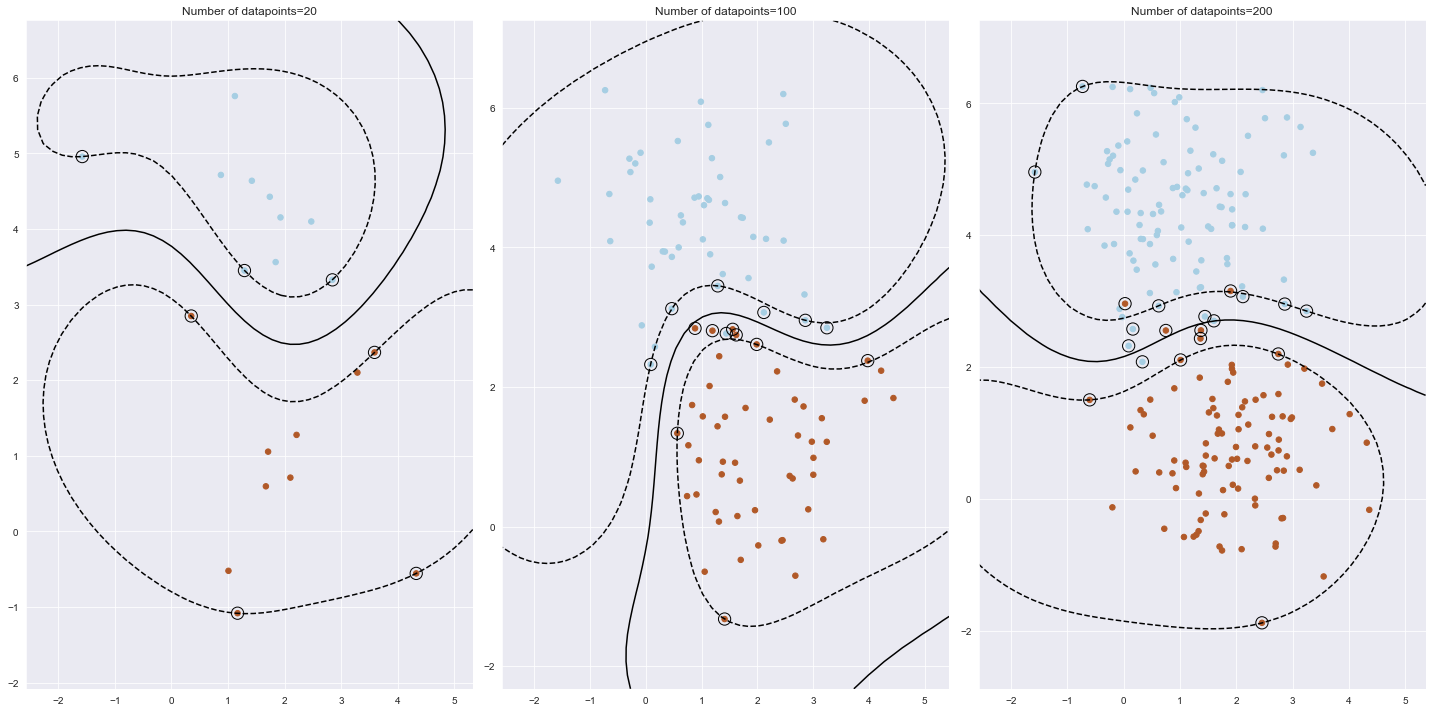

In [41]:
plt.figure(figsize=(20, 10))
# Loop through different regularisation parameters 
n_samples = [20, 100, 200]
for i, N_datapoints in enumerate(n_samples):    
    X, y = make_blobs(n_samples=N_datapoints, centers=2, random_state=0)
    C = 10
    clf = SVC(
        C=C,
        kernel= 'rbf',
        random_state=42).fit(X, y)
    
    support_vectors = clf.support_vectors_

    plt.subplot(1, len(n_samples), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=150,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("Number of datapoints=" + str(N_datapoints))
plt.tight_layout()
plt.show()

Question: 
What do you observe when you add more data points to the dataset - both on the right and on the wrong side of the hyperplane. How does it affect the
classification hyperplane?

Answer: 
RBF
- With more datapoints to one class the classification boundary expands as more confidence is added to the correpsonding class 

Linear 
- Only datapoints that are added in the support vector zone make a difference to the clasisifcation boundary i.e. the data points that define the support vectors themselves. 

Question:

Try out different values of the regularization hyperparameter C and the kernel
parameter sigma. What is the role of the parameters? How do these parameters
affect the classification outcome?


Answer: 

Regularisation hyperparameter C affects the model by adding a term to the objective / loss function. It prevents overfitting by decreasing the weight datapoints have on the loss function. Without regularistion the model is prone to overfitting the data and outliers may decrease the overall classification performance of the model. 


Questions: 
What is a support vector? When does a particular datapoint become a support vector?
When does the importance of the support vector change? Illustrate visually. Note that
a support vector is indicated by a large circle with bold-lined circumference and that
its importance is proportional to the size in the online application.
 What is the role of parameters C and sigma? What happens to the classication
boundary if you change these parameters. Illustrate visually.
 What happens to the classication boundary when sigma is taken very large? Why?